In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [3]:
df=pd.read_csv('/Users/sathish/Downloads/zomato.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml郾 Gurme,208,哿stanbul,"Kemanke侓 Karamustafa Pa侓a Mahallesi, R郾ht郾m Ca...",Karak韄y,"Karak韄y, 哿stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A埕ac郾,208,哿stanbul,"Ko侓uyolu Mahallesi, Muhittin 盱st韄nda埕 Caddesi,...",Ko侓uyolu,"Ko侓uyolu, 哿stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,哿stanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A侓侓k Kahve,208,哿stanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df.shape

(9551, 21)

In [5]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [6]:
len(df['Restaurant Name'].unique())

7446

In [7]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0] 
feature_na

['Cuisines']

In [9]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [10]:
df.dropna(axis='index',subset=['Cuisines'],inplace=True)

In [11]:
df.shape

(9542, 21)

In [12]:
df['Currency'] = 'Rupees'
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Rupees,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Rupees,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Rupees,Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Rupees,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Rupees,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


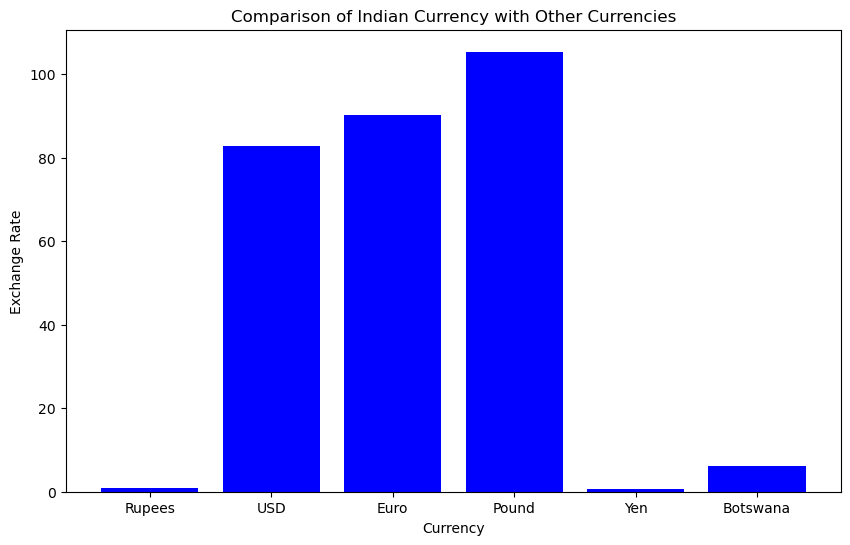

In [13]:
# Sample data
currencies = ['Rupees', 'USD', 'Euro', 'Pound', 'Yen','Botswana']  # Assuming these are the currencies
exchange_rates = [1, 82.81, 90.16, 105.38, 0.55,6.06]  # Sample exchange rates for illustration

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(currencies, exchange_rates, color='blue')
plt.xlabel('Currency')
plt.ylabel('Exchange Rate')
plt.title('Comparison of Indian Currency with Other Currencies')
plt.show()

In [14]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [15]:
country_codes_df = pd.read_excel('/Users/sathish/Downloads/Country-Code.xlsx')
country_codes_df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [16]:
countries = country_codes_df['Country Code'].unique()

In [17]:
countries

array([  1,  14,  30,  37,  94, 148, 162, 166, 184, 189, 191, 208, 214,
       215, 216])

In [18]:
countries_names = country_codes_df['Country'].unique()

In [19]:
import ipywidgets as widgets
dropdown = widgets.Dropdown(
    options=countries_names,
    description='Select Country:',
    disabled=False,
)

# Display dropdown
display(dropdown)

Dropdown(description='Select Country:', options=('India', 'Australia', 'Brazil', 'Canada', 'Indonesia', 'New Z…

In [20]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Rupees,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Rupees,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Rupees,Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Rupees,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Rupees,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml郾 Gurme,208,哿stanbul,"Kemanke侓 Karamustafa Pa侓a Mahallesi, R郾ht郾m Ca...",Karak韄y,"Karak韄y, 哿stanbul",28.977392,41.022793,Turkish,...,Rupees,No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A埕ac郾,208,哿stanbul,"Ko侓uyolu Mahallesi, Muhittin 盱st韄nda埕 Caddesi,...",Ko侓uyolu,"Ko侓uyolu, 哿stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Rupees,No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,哿stanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Rupees,No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A侓侓k Kahve,208,哿stanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.036019,41.057979,Restaurant Cafe,...,Rupees,No,No,No,No,4,4.0,Green,Very Good,901


In [21]:
df_merge = pd.merge(df,country_codes_df,on='Country Code',how='left')
df_merge.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [22]:
# Function to update charts based on selected country
def update_charts(country_name):
    # Filter data for the selected country
    country_data = df[df['Country'] == country_name]
    
    # Chart 1: Distribution of restaurants across cities
    plt.figure(figsize=(10, 6))
    country_data['City'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Distribution of Restaurants Across Cities')
    plt.xlabel('City')
    plt.ylabel('Number of Restaurants')
    plt.xticks(rotation=45)
    plt.show()

    # Chart 2: Average cost for two people dining at restaurants
    plt.figure(figsize=(10, 6))
    country_data.groupby('City')['Average Cost for two'].mean().plot(kind='bar', color='lightgreen')
    plt.title('Average Cost for Two People Dining')
    plt.xlabel('City')
    plt.ylabel('Average Cost (in Rupees)')
    plt.xticks(rotation=45)
    plt.show()

# Event listener for dropdown change
def dropdown_eventhandler(change):
    update_charts(change.new)

# Attach event listener to dropdown
dropdown.observe(dropdown_eventhandler, names='value')

# Display dropdown
display(dropdown)

Dropdown(description='Select Country:', options=('India', 'Australia', 'Brazil', 'Canada', 'Indonesia', 'New Z…

In [25]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

([<matplotlib.patches.Wedge at 0x138cc17d0>,
 [Text(-1.0754537485723337, 0.23108274423183509, 'India'),
  Text(1.05734911623794, -0.30333619367106107, 'United States'),
  Text(1.0935476044218948, -0.11896905842753965, 'United Kingdom'),
  Text(1.097957059902713, -0.06700966057062333, 'Brazil'),
  Text(1.0997729465240367, -0.02234873808157454, 'UAE')])

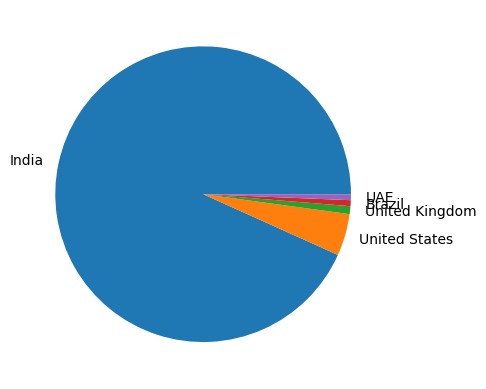

In [27]:
#Let's plot some charts to  the data better:
name = df_merge['Country'].value_counts().index #Index function helps us to view only country name, inorder to view the more information about the country do not use index word.
     

value = df_merge['Country'].value_counts().values
plt.pie(value[:5], labels=name[:5])

In [29]:
df1=df.groupby(['Locality','Has Online delivery'])['Restaurant Name'].count()
df1.to_csv("location_online.csv")
df1=pd.read_csv("location_online.csv")
df1=pd.pivot_table(df1,values=None,
                   index=['Locality'],
                   columns=['Has Online delivery'],
                   fill_value=0,
                   aggfunc=np.sum
                   )

df1

Restaurant Name    
Has Online delivery                              No Yes
Locality                                               
 ILD Trade Centre Mall, Sohna Road                1   1
12th Square Building, Banjara Hills               0   1
A Hotel, Gurdev Nagar                             1   0
ARSS Mall, Paschim Vihar                          1   0
Aaya Nagar                                        1   0
...                                             ...  ..
ibis New Delhi, Aerocity                          2   0
盱mitk韄y                                           1   0
韥guas Claras                                      3   0
韴ayyolu                                           1   0
韴ukurambar                                        1   0

[1206 rows x 2 columns]

In [30]:
df1.plot(kind='bar',figsize=(15,8))

<Axes: xlabel='Locality'>

/Users/sathish/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 38852 (\N{CJK UNIFIED IDEOGRAPH-97C4}) missing from current font.
  func(*args, **kwargs)
/Users/sathish/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 22485 (\N{CJK UNIFIED IDEOGRAPH-57D5}) missing from current font.
  func(*args, **kwargs)
/Users/sathish/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 37118 (\N{CJK UNIFIED IDEOGRAPH-90FE}) missing from current font.
  func(*args, **kwargs)
/Users/sathish/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 20371 (\N{CJK UNIFIED IDEOGRAPH-4F93}) missing from current font.
  func(*args, **kwargs)
/Users/sathish/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24666 (\N{CJK UNIFIED IDEOGRAPH-605A}) missing from current font.
  func(*args, **kwargs)
/Users/sathish/anaconda3/lib/python3.11/site-packa

Error in callback <function _draw_all_if_interactive at 0x12f782e80> (for post_execute):
